In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_excel('./Publicidad_ventas_ABC.xlsx')
df.drop(columns=['ID'], axis=1, inplace=True)
df.head()

,Publicidad,Ventas,Sede
0,75.72,1245.30,A
1,122.91,1482.49,A
2,209.64,1656.05,A
3,249.79,1482.49,A
4,181.63,1413.07,A


In [4]:
df.Sede.value_counts()

Sede
A    15
B    15
C    15
Name: count, dtype: int64

¿Cúal es el modelo que me permite estimar las ventas que voy a alcanzar en función de la publicidad que realizo?

Lo primero que se hace es la grafica

Text(0.5, 1.0, 'Publicidad vs Ventas')

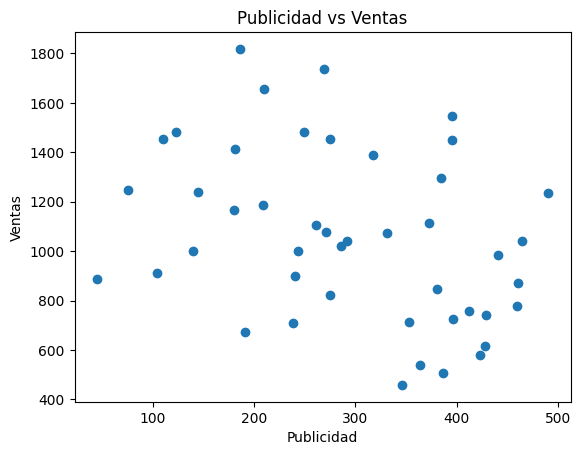

In [5]:
plt.scatter(df.Publicidad, df.Ventas)
plt.xlabel('Publicidad')    
plt.ylabel('Ventas')
plt.title('Publicidad vs Ventas')

<Axes: xlabel='Publicidad', ylabel='Ventas'>

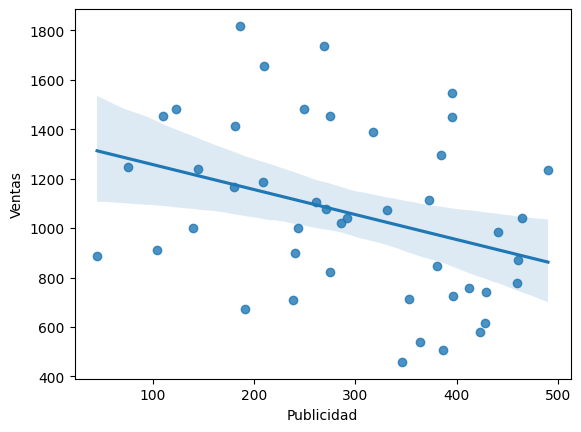

In [6]:
sns.regplot(x='Publicidad', y='Ventas', data=df)

In [7]:
# Calcular la correlación
df.corr(numeric_only=True)


,Publicidad,Ventas
Publicidad,1.000000,-0.347235
Ventas,-0.347235,1.000000


In [8]:


x = df[['Publicidad']]
y = df['Ventas']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

rl = LinearRegression()

rl.fit(x_train, y_train)    
print(rl.score(x_train, y_train))
print(rl.intercept_)
print(rl.coef_)


0.1623562224599977
1411.7359872468242
[-1.25467245]


$$ ventas = 1411 - 1.25 * publicidad $$
$$ R^2 = 0.16$$

consideramos la variable ``Sede``

<Axes: xlabel='Publicidad', ylabel='Ventas'>

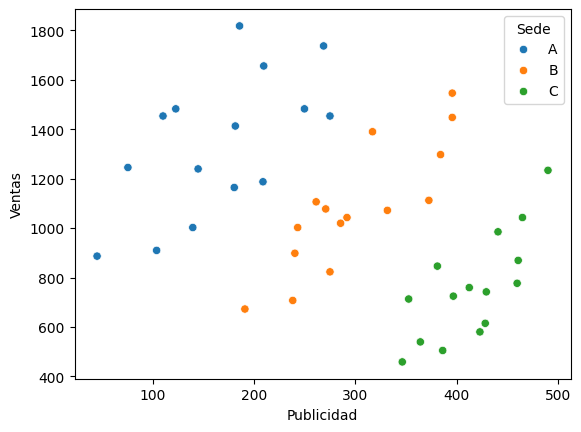

In [9]:
sns.scatterplot(x='Publicidad', y='Ventas',hue='Sede', data=df)


Calcular la correlacion por `sede`

In [10]:
# Calcular la correlacion por `sede`
df.groupby('Sede').corr(numeric_only=True)


Publicidad    Ventas
Sede                                 
A    Publicidad    1.000000  0.613576
     Ventas        0.613576  1.000000
B    Publicidad    1.000000  0.848839
     Ventas        0.848839  1.000000
C    Publicidad    1.000000  0.746393
     Ventas        0.746393  1.000000

In [11]:

df_dummies = pd.get_dummies(df)
df_dummies.head()

,Publicidad,Ventas,Sede_A,Sede_B,Sede_C
0,75.72,1245.30,True,False,False
1,122.91,1482.49,True,False,False
2,209.64,1656.05,True,False,False
3,249.79,1482.49,True,False,False
4,181.63,1413.07,True,False,False


In [12]:
# entrenar el modelo con la variable `Sede`
x = df_dummies.drop(columns=['Ventas'], axis=1)
y = df_dummies['Ventas']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
rl = LinearRegression()
rl.fit(x_train, y_train)
print(rl.score(x_train, y_train))
print(rl.intercept_)
print(rl.coef_)


0.7873347386868179
221.38661115421814
[   2.8543927   686.77394031  -16.43986    -670.33408031]


$$ Ventas = 221 + 2.85 * Publicidad+ 686.773 * Sede_A - 16.43 * Sede_B - 670.33 * Sede_C$$

In [17]:
# Con OLS
import statsmodels.formula.api as smf
df = pd.DataFrame(x_train, columns=x_train.columns)
df["Ventas"] = y_train.values
indep_vars = " + ".join(df.columns.drop("Ventas"))
formula = f"Ventas ~ {indep_vars}"
regre = smf.ols(formula=formula, data=df).fit()
print(regre.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     39.49
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           7.23e-11
Time:                        08:47:29   Log-Likelihood:                -235.14
No. Observations:                  36   AIC:                             478.3
Df Residuals:                      32   BIC:                             484.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        166.0400    109.725      1.

$$ Ventas = 166,04 + 2,85*Publicidad + 742,12*Sede_A -614,98*Sede_C $$
